In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

import os  

In [ ]:
#TYpes of log reg

1. Binary (Pass/Fail)  -Activation function - Sigmoid
2. Multi (Cats, Dogs, Sheep) - Activation function - Softmax
3. Ordinal (Low, Medium, High) - 

In [ ]:
categorical variables

- Nominal (No ordering)

- ordinal (Order)

In [3]:
path = 'log_reg.csv'  
data = pd.read_csv(path, header=None, names=['Studied', 'Slept', 'Passed'])  
data.head()

,Studied,Slept,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


In [5]:
data

,Studied,Slept,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
5,1.922270,1.331427,0
6,8.978216,0.993438,1
7,6.635603,8.542803,1
8,7.672359,5.416400,1
9,4.866015,2.042671,0


In [6]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

#logistic regression
#similar to linear regression 
#--- Activation function (map predicted values to probabilities) -- o/p (probabilities | (0 0r 1))

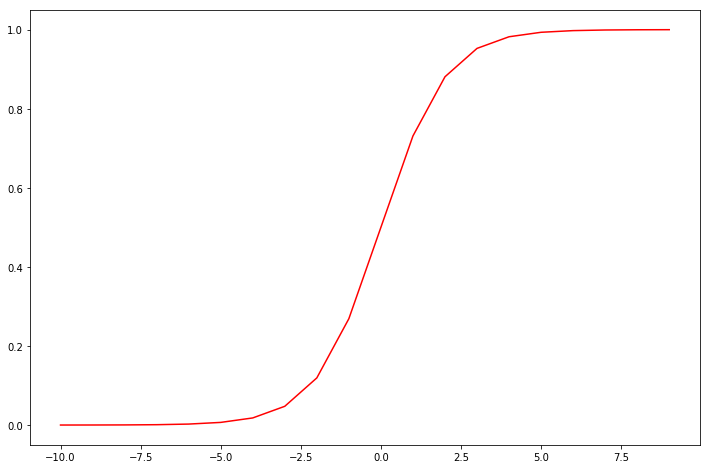

In [7]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(nums, sigmoid(nums), 'r')

In [8]:
def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

In [ ]:
y = w0 + w1*x1 + w2*x2

Main idea - to calculate weights

cost function (linear reg - Mean sq.error)

Optimization algo (min the cost or max. )

Objective function (Optimizatino algo + cost function)


In [ ]:
#Prediction function is a non-linear function (sigmoid) , squaring the prediction (which we do in MSE) 
# results in a non - convex function with many local minimums 


#if fn has many local minimums gradient descent won't work

In [ ]:
def cost_function(features, labels, weights):
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum()/observations

    return cost

In [ ]:
calculate gradient average

multiplied by the learning rate

subtracted from weights

In [ ]:
def update_weights(features, labels, weights, lr):
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [ ]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

In [ ]:
precision - recall curves to find the optimum threshold 

In [ ]:
def classify(preds):
  decision_boundary = np.vectorize(decision_boundary)
  return decision_boundary(predictions).flatten()

In [ ]:
Probabilities = [ 0.967, 0.448, 0.015, 0.780, 0.978, 0.004]
Classifications = [1, 0, 0, 1, 1, 0]

In [ ]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print "iter: "+str(i) + " cost: "+str(cost)

    return weights, cost_history

In [ ]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [ ]:
Multi class classification - 

Multi label classification - 